# Colab

In [25]:
#Mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Imports/Settings

In [1]:
#Paths
import os
from pathlib import Path
fp_repo = "/Users/roseline/Docs/AI/GITHUB/unsupervised-alignment"
#fp_repo = '/content/gdrive/My Drive/unsupervised-alignment-team-master'
fp_intersect = fp_repo / Path('python','assets','intersect')
fp_save = fp_repo / Path('save')
os.chdir(fp_repo / Path('python'))

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
#Custom
import utils
import models
#KERAS
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model

Using TensorFlow backend.


# Get path of save folder/ models and data

In [9]:
#Params and associated save folder
n_systems,n_concepts,noise,emb_dim,n_epicentres,linearsep = 2,200,0.001,2,1,1
max_restart,max_epoch,batch_size = 110,30,100
template_save = 'DATA_nsys{0}ncon{1}noise{2:.3f}emb_dim{3}nepi{4}linearsep{5}_NN_mrest{6}mepo{7}bsz{8}'
save_folder = template_save.format(n_systems,n_concepts,noise,emb_dim,n_epicentres,linearsep,max_restart,max_epoch,batch_size)
#Or just copy paste
save_folder = "DATA_nsys2ncon200noise0.001emb_dim2nepi1linearsep1_NN_mrest110mepo30bsz100_2"
print(save_folder)
fp_runs = fp_save / Path(save_folder)
fp_models = fp_runs / Path('models')
print(fp_models)

DATA_nsys2ncon200noise0.001emb_dim2nepi1linearsep1_NN_mrest110mepo30bsz100_2
/Users/roseline/Docs/UCL/Projects/B.Roads/B.Roads code/Fork/unsupervised-alignment-team-master/save/DATA_nsys2ncon200noise0.001emb_dim2nepi1linearsep1_NN_mrest110mepo30bsz100_2/models


In [3]:
fp_runs_list = []
fp_models_list = []
for i in range(1,8):
    save_folder = 'clump%d'%i
    fp_runs_list.append(fp_save / Path(save_folder))
    fp_models_list.append(fp_save / Path(save_folder,'models'))

In [4]:
fp_runs = fp_runs_list[5]
fp_models =fp_models_list[5]
#Get/Display run params
with open(fp_runs /Path('dict_params.pickle'), 'rb') as handle:
    dict_params = pickle.load(handle)
display(pd.DataFrame([dict_params]))

,experiment_name,experiment_id,n_systems,n_concepts,noise,emb_dim,n_epicentres,linearsep,n_runs,max_restart,max_epoch,batch_size,gmm_scale,loss_distr_scale,loss_cycle_scale,lr
0,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,2,200,0.001,2,3,4,10,110,30,100,0.01,1.0,10000.0,0.001


In [5]:
#========GET RESULTS==========
with open(str(fp_runs)+'/all_res.pickle', 'rb') as handle:
    all_res = pickle.load(handle)
with open(str(fp_runs)+'/summary_res.pickle', 'rb') as handle:
    summary_res = pickle.load(handle)
df_all_res = pd.DataFrame(utils.flatten_list_of_list(all_res))
df_summary_res = pd.DataFrame(summary_res)
display(df_summary_res)
display(df_all_res[(df_all_res['epoch']==29)& (df_all_res['restart']<100)])
#display(df_all_res[(df_all_res['run']==2) & (df_all_res['epoch']==29) & (df_all_res['restart']>60)& (df_all_res['restart']<100) ])

,experiment_name,experiment_id,sd_run,last_restart,loss_total,cycle_loss,dist_loss_f,dist_loss_g,acc_f1,acc_f5,acc_f10,acc_fhalf,acc_g1,acc_g5,acc_g10,acc_ghalf
0,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,4941,33,0.025630,0.022675,-0.000062,0.003017,0.930,1.0,1.0,1.0,0.945,1.0,1.0,1.0
1,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,5927,43,0.042271,0.031070,0.005874,0.005326,0.950,1.0,1.0,1.0,0.960,1.0,1.0,1.0
2,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,8947,15,0.057919,0.044162,0.006581,0.007177,0.970,1.0,1.0,1.0,0.970,1.0,1.0,1.0
3,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,482,6,0.027353,0.020648,0.005568,0.001137,0.970,1.0,1.0,1.0,0.990,1.0,1.0,1.0
4,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,8268,2,0.061439,0.041250,0.010566,0.009623,0.960,1.0,1.0,1.0,0.975,1.0,1.0,1.0
5,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,3529,10,1.982327,1.731788,0.102863,0.147676,0.950,1.0,1.0,1.0,0.905,1.0,1.0,1.0
6,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,3469,87,0.023045,0.021220,-0.002689,0.004513,0.955,1.0,1.0,1.0,0.955,1.0,1.0,1.0
7,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,6632,5,0.059977,0.049724,0.003311,0.006942,0.985,1.0,1.0,1.0,0.950,1.0,1.0,1.0
8,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,6899,8,0.103247,0.069959,0.017006,0.016281,0.980,1.0,1.0,1.0,0.980,1.0,1.0,1.0
9,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1623,100,0.047862,0.042309,0.002498,0.003055,0.950,1.0,1.0,1.0,0.950,1.0,1.0,1.0


,experiment_name,experiment_id,run,restart,sd_restart,epoch,loss_total,cycle_loss,dist_loss_f,dist_loss_g,...,acc_f10,acc_fhalf,acc_g1,acc_g5,acc_g10,acc_ghalf,new_f,new_g,best_f,best_g
29,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,0,279,29,10.400017,0.966573,4.427737,5.005706,...,0.000,0.240,0.000,0.000,0.000,0.240,True,True,True,True
59,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,1,8168,29,5.162236,0.048706,2.506824,2.606706,...,0.000,0.270,0.000,0.000,0.005,0.170,True,True,True,True
89,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,2,3949,29,0.094877,0.068921,0.012267,0.013688,...,1.000,1.000,0.880,1.000,1.000,1.000,True,True,True,True
119,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,3,1478,29,5.022789,0.081222,2.524624,2.416943,...,0.000,0.270,0.000,0.000,0.005,0.175,True,True,False,False
149,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,4,3575,29,11.036947,0.193136,5.484430,5.359381,...,0.000,0.115,0.000,0.000,0.000,0.115,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32579,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,95,9058,29,1.441831,0.119964,0.669647,0.652220,...,0.115,0.425,0.015,0.065,0.110,0.425,True,True,False,False
32609,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,96,8072,29,1.946679,0.079644,0.870421,0.996614,...,0.000,0.175,0.000,0.000,0.000,0.255,True,True,False,False
32639,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,97,7968,29,2.006548,0.124585,0.872017,1.009946,...,0.000,0.185,0.000,0.000,0.000,0.250,True,True,False,False
32669,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,98,6968,29,0.091920,0.075427,0.007316,0.009176,...,1.000,1.000,0.915,1.000,1.000,1.000,True,True,False,False


In [6]:
run_id = 'run%d'%1
restart_id = 'final'
model_f_path = fp_models /Path(run_id,restart_id,'model_f')
model_g_path = fp_models /Path(run_id,restart_id,'model_g')
print(os.listdir(model_f_path))

['checkpoint', 'model_f.index', 'model_f.data-00000-of-00002', 'model_f.data-00001-of-00002']


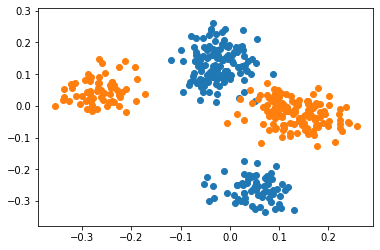

In [7]:
#=====GET DATA============
with open(fp_models /Path(run_id,'x.pickle'), 'rb') as handle:
    x = pickle.load(handle)
with open(fp_models /Path(run_id,'y.pickle'), 'rb') as handle:
    y = pickle.load(handle)
#PLot
plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1])

In [10]:
#=====GET MODELS============
model_f = models.MLP(emb_dim, emb_dim)
model_g = models.MLP(emb_dim, emb_dim)
model_f.build(x.shape)
model_g.build(y.shape)
model_f.load_weights(str(model_f_path)+'/model_f') 
model_g.load_weights(str(model_g_path)+'/model_g') 
print(model_f.summary())
#print(model_f.layers[0].get_weights())

Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  300       
_________________________________________________________________
dense_1 (Dense)              multiple                  10100     
_________________________________________________________________
dense_2 (Dense)              multiple                  10100     
_________________________________________________________________
dense_3 (Dense)              multiple                  202       
Total params: 20,702
Trainable params: 20,702
Non-trainable params: 0
_________________________________________________________________
None


# Test model on data

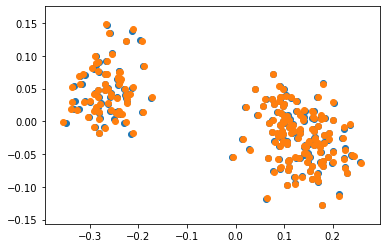

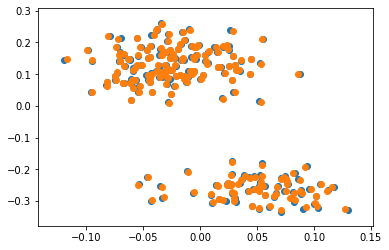

In [11]:
#=====APPLY MODEL TEST==========
f_x = model_f(x)
g_y = model_g(y)
#Plot
plt.figure()
plt.scatter(f_x[:,0],f_x[:,1])
plt.scatter(y[:,0],y[:,1])
plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.scatter(g_y[:,0],g_y[:,1])

# Plot last restarts

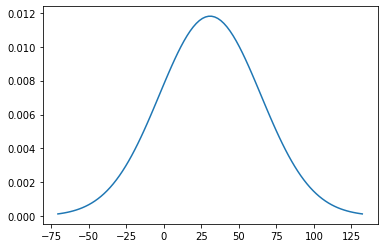

In [12]:
#Last restart
last_restarts = list(df_summary_res['last_restart'])
avg_last_restart = np.mean(last_restarts)
std_last_restart = np.std(last_restarts)
mu = avg_last_restart
sigma = std_last_restart 
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [13]:
def sns_cat_data_to_df(categories,data_list):
  #Put data in df for seaborn use
  dict_list = []
  for c in range(len(categories)):
    data = data_list[c]
    for i in range(len(data)):
      dict_list.append({'cat':categories[c],'values':data[i]})
  df = pd.DataFrame(dict_list)
  return df
categories = ['run1']
data_list = [last_restarts]
df = sns_cat_data_to_df(categories,data_list)
df

,cat,values
0,run1,33
1,run1,43
2,run1,15
3,run1,6
4,run1,2
5,run1,10
6,run1,87
7,run1,5
8,run1,8
9,run1,100


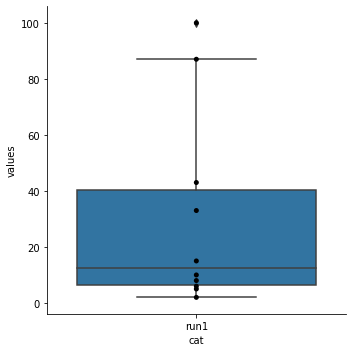

In [14]:
g = sns.catplot(x="cat", y="values", data=df, kind="box")
sns.stripplot(x="cat", y="values", data=df,color="k",jitter=False, ax=g.ax)

# Plot accuracies after all restarts

In [15]:
df_epoch29_newf = utils.get_df(df_all_res, epoch=29, new_f=True)
df_epoch29_newg = utils.get_df(df_all_res, epoch=29, new_g=True)
df_epoch29_newfg = utils.get_df(df_all_res, epoch=29, new_f=True, new_g=True)
df_epoch29_newf

,experiment_name,experiment_id,run,restart,sd_restart,epoch,loss_total,cycle_loss,dist_loss_f,dist_loss_g,...,acc_f10,acc_fhalf,acc_g1,acc_g5,acc_g10,acc_ghalf,new_f,new_g,best_f,best_g
29,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,0,279,29,10.400017,0.966573,4.427737,5.005706,...,0.000,0.240,0.000,0.000,0.000,0.240,True,True,True,True
59,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,1,8168,29,5.162236,0.048706,2.506824,2.606706,...,0.000,0.270,0.000,0.000,0.005,0.170,True,True,True,True
89,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,2,3949,29,0.094877,0.068921,0.012267,0.013688,...,1.000,1.000,0.880,1.000,1.000,1.000,True,True,True,True
119,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,3,1478,29,5.022789,0.081222,2.524624,2.416943,...,0.000,0.270,0.000,0.000,0.005,0.175,True,True,False,False
149,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,4,3575,29,11.036947,0.193136,5.484430,5.359381,...,0.000,0.115,0.000,0.000,0.000,0.115,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32579,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,95,9058,29,1.441831,0.119964,0.669647,0.652220,...,0.115,0.425,0.015,0.065,0.110,0.425,True,True,False,False
32609,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,96,8072,29,1.946679,0.079644,0.870421,0.996614,...,0.000,0.175,0.000,0.000,0.000,0.255,True,True,False,False
32639,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,97,7968,29,2.006548,0.124585,0.872017,1.009946,...,0.000,0.185,0.000,0.000,0.000,0.250,True,True,False,False
32669,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,98,6968,29,0.091920,0.075427,0.007316,0.009176,...,1.000,1.000,0.915,1.000,1.000,1.000,True,True,False,False


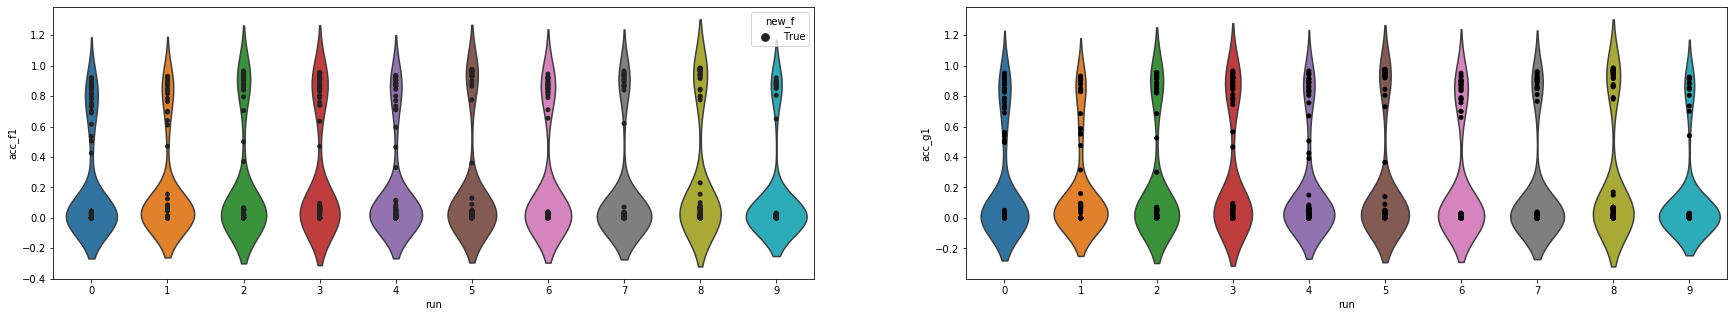

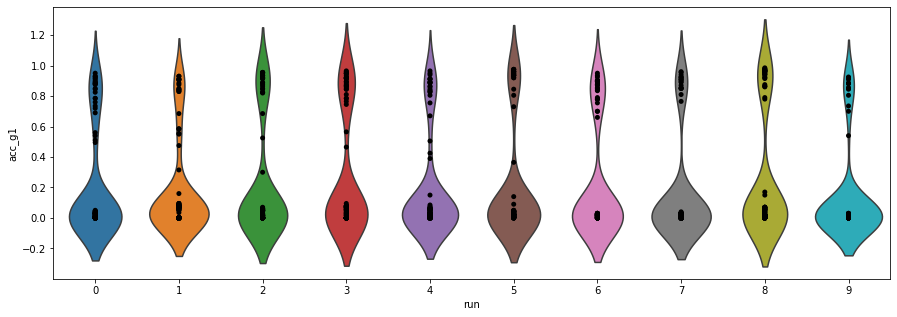

In [16]:
#Show accuracy of each restart where a new f or g is chosen (after 29 epochs) / per run
fig, axes = plt.subplots(1, 2,figsize = (30,5))
sns.violinplot(x="run", y="acc_f1", data=df_epoch29_newf, inner=None, ax=axes[0])
sns.stripplot(x="run", y="acc_f1", hue = 'new_f',data=df_epoch29_newf,color="k",jitter=False, ax=axes[0])
sns.violinplot(x="run", y="acc_g1", data=df_epoch29_newg, inner=None, ax=axes[1])
sns.stripplot(x="run", y="acc_g1", data=df_epoch29_newg,color="k",jitter=False, ax=axes[1])
#New plot
fig, ax = plt.subplots(1, 1,figsize = (15,5))
sns.violinplot(x="run", y="acc_g1", data=df_epoch29_newfg, inner=None,ax=ax)
sns.stripplot(x="run", y="acc_g1", data=df_epoch29_newfg,color="k",jitter=False, ax=ax)

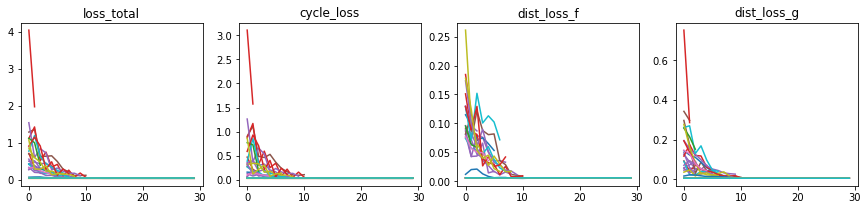

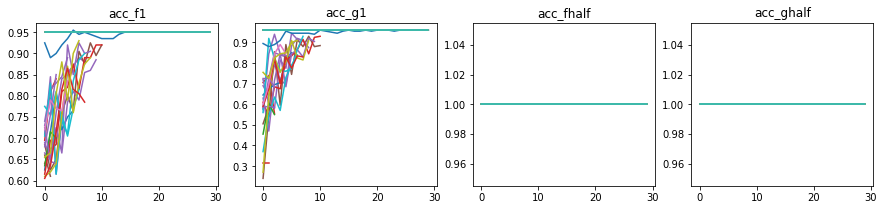

In [18]:
fig1, axes1 = plt.subplots(1, 4,figsize=(15,3))
fig2, axes2 = plt.subplots(1, 4,figsize=(15,3))
df = utils.get_df(df_all_res, run=1)
df = df[(df['acc_f1']>0.6)]
#df = df[(df['acc_f1']<0.8) & (df['acc_g1']<0.8)]
n_restarts = max(list(df['restart']))+1
for r in range(n_restarts):
    df_restart = df[df['restart']==r]
    utils.plot_df_columns(axes1,df_restart,['loss_total','cycle_loss','dist_loss_f','dist_loss_g'])
    utils.plot_df_columns(axes2,df_restart,['acc_f1','acc_g1','acc_fhalf','acc_ghalf'])

# Plot results

In [19]:
df = df_all_res
n_restarts = max(list(df['restart']))+1
df

,experiment_name,experiment_id,run,restart,sd_restart,epoch,loss_total,cycle_loss,dist_loss_f,dist_loss_g,...,acc_f10,acc_fhalf,acc_g1,acc_g5,acc_g10,acc_ghalf,new_f,new_g,best_f,best_g
0,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,0,279,0,392.282288,206.557053,90.457268,95.267982,...,0.015,0.200,0.00,0.01,0.02,0.170,True,True,True,True
1,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,0,279,1,109.504601,47.542854,34.061474,27.900274,...,0.000,0.160,0.00,0.00,0.00,0.155,True,True,True,True
2,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,0,279,2,136.594574,86.456741,25.586565,24.551268,...,0.000,0.155,0.00,0.00,0.00,0.160,True,True,True,True
3,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,0,279,3,116.529739,64.886726,26.331055,25.311960,...,0.000,0.165,0.00,0.00,0.00,0.165,True,True,True,True
4,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,0,0,279,4,100.894440,53.111439,23.837002,23.946005,...,0.000,0.170,0.00,0.00,0.00,0.160,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,109,6041,25,0.047865,0.042311,0.002498,0.003056,...,1.000,1.000,0.95,1.00,1.00,1.000,False,False,True,True
32996,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,109,6041,26,0.047864,0.042311,0.002498,0.003056,...,1.000,1.000,0.95,1.00,1.00,1.000,False,False,True,True
32997,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,109,6041,27,0.047863,0.042310,0.002498,0.003056,...,1.000,1.000,0.95,1.00,1.00,1.000,False,False,True,True
32998,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,9,109,6041,28,0.047862,0.042309,0.002498,0.003055,...,1.000,1.000,0.95,1.00,1.00,1.000,False,False,True,True


In [20]:
#Last results for selected run
df_final = df[(df['run']==1) & (df['epoch']==29)]
df_final

,experiment_name,experiment_id,run,restart,sd_restart,epoch,loss_total,cycle_loss,dist_loss_f,dist_loss_g,...,acc_f10,acc_fhalf,acc_g1,acc_g5,acc_g10,acc_ghalf,new_f,new_g,best_f,best_g
3329,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,0,279,29,3.870874,0.098335,1.904697,1.867842,...,0.000,0.145,0.00,0.00,0.000,0.125,True,True,True,True
3359,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,1,8168,29,1.378678,0.074425,0.642174,0.662079,...,0.260,0.910,0.08,0.18,0.280,0.920,True,True,True,True
3389,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,2,3949,29,1.903171,0.551118,0.738395,0.613658,...,0.245,0.910,0.07,0.15,0.245,0.895,True,True,False,True
3419,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,3,1478,29,2.711149,0.099198,1.242888,1.369063,...,0.000,0.125,0.00,0.00,0.000,0.135,True,True,False,False
3449,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,4,3575,29,0.101125,0.054831,0.032986,0.013309,...,1.000,1.000,0.91,1.00,1.000,1.000,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,105,778,29,0.042451,0.031208,0.005891,0.005352,...,1.000,1.000,0.96,1.00,1.000,1.000,False,False,True,True
6509,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,106,7365,29,0.042407,0.031174,0.005887,0.005346,...,1.000,1.000,0.96,1.00,1.000,1.000,False,False,True,True
6539,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,107,6346,29,0.042362,0.031140,0.005883,0.005339,...,1.000,1.000,0.96,1.00,1.000,1.000,False,False,True,True
6569,clump6,aa2cf965-be26-469f-8ba1-e4b2a3ac5569,1,108,423,29,0.042317,0.031105,0.005879,0.005333,...,1.000,1.000,0.96,1.00,1.000,1.000,False,False,True,True


In [21]:
#Best model training curve
#When best models started (which restart)
best_f_start = df_final.loc[(df_final['new_f']==True) & (df_final['best_f']==True)].iloc[-1]['restart']
best_g_start = df_final.loc[(df_final['new_g']==True) & (df_final['best_g']==True)].iloc[-1]['restart']
#Subsequent training of same model
restart_idx_best_f = list(df_final.loc[(df_final['restart']>best_f_start) & (df_final['new_f']==False) & (df_final['best_f']==True)]['restart'])
restart_idx_best_f.insert(0, best_f_start)
restart_idx_best_g = list(df_final.loc[(df_final['restart']>best_g_start) & (df_final['new_g']==False) & (df_final['best_g']==True)]['restart'])
restart_idx_best_g.insert(0, best_g_start) 
print(restart_idx_best_f)
print(restart_idx_best_g)
#df subsets
df = df_all_res
df = utils.get_df(df,run=1)
df_best_f = df[df['restart'].isin(restart_idx_best_f[:1])]
df_best_g = df[df['restart'].isin(restart_idx_best_g[:1])]

[15, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
[43, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


<Figure size 432x288 with 0 Axes>

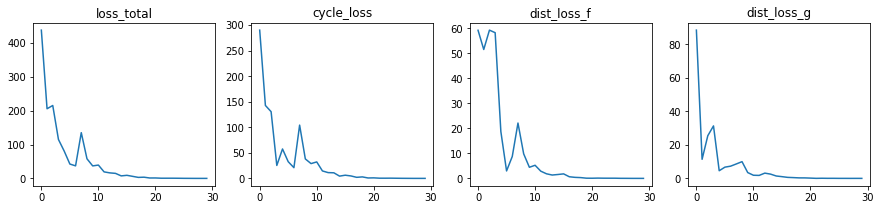

<Figure size 432x288 with 0 Axes>

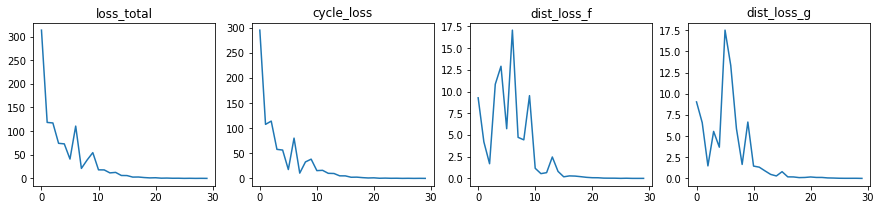

In [22]:
plt.figure()
f, axes = plt.subplots(1, 4,figsize=(15,3))
utils.plot_df_columns(axes,df_best_f,['loss_total','cycle_loss','dist_loss_f','dist_loss_g'])
plt.figure()
g, axes = plt.subplots(1, 4,figsize=(15,3))
utils.plot_df_columns(axes,df_best_g,['loss_total','cycle_loss','dist_loss_f','dist_loss_g'])

<Figure size 432x288 with 0 Axes>

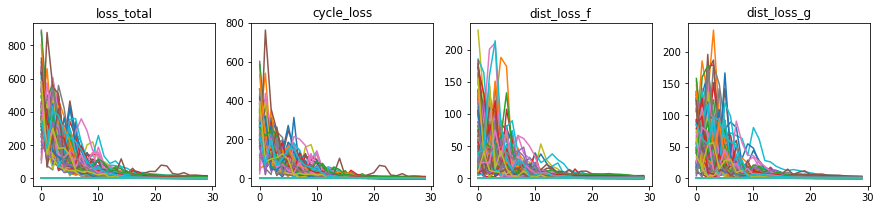

In [23]:
plt.figure()
f, axes = plt.subplots(1, 4,figsize=(15,3))
x = np.arange(max_epoch)
for r in range(n_restarts):
    df_restart = df[df['restart']==r]
    utils.plot_df_columns(axes,df_restart,['loss_total','cycle_loss','dist_loss_f','dist_loss_g'])